In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2
from sklearn import svm

import nltk
import numpy as np
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
dataset = pd.read_csv("https://raw.githubusercontent.com/ravellaabhinav/BBC-News-Claaification/main/bbc_news.csv")
dataset.shape

(1490, 3)

In [87]:
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [88]:
dataset['category_id'] = dataset.Category.factorize()[0]
dataset.head()

,ArticleId,Text,Category,category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [89]:
print(dataset['Category'].value_counts())

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64


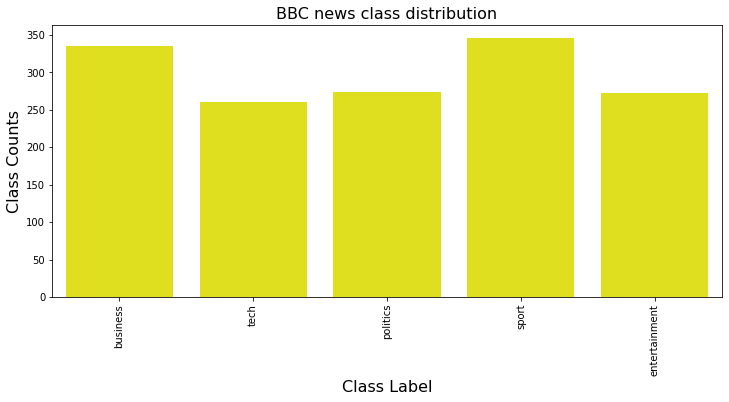

In [90]:
plt.figure(figsize=(12,5))
sns.countplot(x=dataset.Category, color='yellow')
plt.title('BBC news class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

In [91]:
# Converting the catergory labels into numeric values using Encoder
labelEncoder = preprocessing.LabelEncoder()
dataset['category_id'] = labelEncoder.fit_transform(dataset['Category'])
print(dataset['category_id'].value_counts())

3    346
0    336
2    274
1    273
4    261
Name: category_id, dtype: int64


In [92]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.remove_stopwords ,
           gsp.strip_short,
           gsp.stem_text
          ]

def clean_text(dataset):
    dataset = dataset.lower()
    dataset = utils.to_unicode(dataset)
    for f in filters:
        dataset = f(dataset)
    return dataset

In [93]:
dataset["clean_text"] = dataset["Text"].apply(clean_text)
dataset.head()

,ArticleId,Text,Category,category_id,clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,worldcom boss launch defenc lawyer defend worl...
1,154,german business confidence slides german busin...,business,0,german busi confid slide german busi confid fe...
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,bbc poll indic econom gloom citizen major nati...
3,1976,lifestyle governs mobile choice faster bett...,tech,4,lifestyl govern mobil choic faster better funk...
4,917,enron bosses in $168m payout eighteen former e...,business,0,enron boss 168m payout eighteen enron director...


In [94]:
dataset.iloc[2,1]

'bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions impr

In [95]:
clean_text(dataset.iloc[2,1])

'bbc poll indic econom gloom citizen major nation survei bbc world servic poll believ world economi worsen respond said nation economi get wors ask famili financi outlook major countri said posit futur 000 peopl countri question poll conduct asian tsunami disast poll major plural peopl countri believ economi go downhil compar respond countri believ improv survei countri split percentag term averag respond countri said world economi get wors compar said improv similarli pessimist nation economi optimist saw famili econom condit improv said get wors poll 953 peopl conduct intern poll firm globescan program intern polici attitud pipa univers maryland world economi pick difficult time year ago peopl fulli absorb develop person experienc effect said pipa director steven kull peopl world sai world isn percept war terror religi polit divis make world wors place far reflect global econom perform sai bbc elizabeth blunt countri peopl optimist world famili fast grow develop economi china india f

In [96]:
# Splitting the dataset into Training and Testing Data
train_text, test_text, train_labels, test_labels = train_test_split(dataset["clean_text"], dataset["category_id"], train_size=0.7, random_state=5)

print("Train x size :", train_text.shape)
print("Train y size :", train_labels.shape)
print("Test x size :", test_text.shape)
print("Test y size :", test_labels.shape)

Train x size : (1043,)
Train y size : (1043,)
Test x size : (447,)
Test y size : (447,)


In [97]:
model = []                                                                      # Model names
accuracy = [] 

In [98]:
# Extracting features by counting word counts
countVector = CountVectorizer(min_df=2)
countVector.fit_transform(train_text)
trainFeatureSet = countVector.transform(train_text)
testFeatureSet = countVector.transform(test_text)

In [99]:
testFeatureSet.shape

(447, 7933)

In [100]:
#Logistic Regression Model for training Data using s
logRegModel = LogisticRegression()
logRegModel.fit(trainFeatureSet,train_labels)

LogisticRegression()

In [101]:
# Finding the predictions of text dataset
predLogReg1 = logRegModel.predict(testFeatureSet)
score = logRegModel.score(testFeatureSet,test_labels)
print("Approximate Accuracy with countVectorizer : ", score*100)

Approximate Accuracy with countVectorizer :  97.31543624161074


In [102]:
# Extracting Features with TdIdf
tfIdVector = TfidfVectorizer(min_df=2,norm='l2',smooth_idf=True,use_idf=True)

#Extracting train and test features
tfidTrainFeatures = tfIdVector.fit_transform(train_text)
tfidTestFeatures = tfIdVector.transform(test_text)

In [103]:
from sklearn.linear_model import LogisticRegression                             # train a logistic regression model on the training set
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report

logRegModel2 = LogisticRegression()               # instantiate model
logRegModel2.fit(tfidTrainFeatures,train_labels)                                                     # fit model
predicted_values = logRegModel2.predict(tfidTestFeatures)                                       # make class predictions for the testing set
x = logRegModel2.score(tfidTestFeatures,test_labels)
model.append('Logistic Regression')
accuracy.append(x*100)

print("Logistic Regression's Accuracy is: ", x*100)

Logistic Regression's Accuracy is:  96.64429530201343


In [104]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(tfidTrainFeatures,train_labels)
predicted_values = RF.predict(tfidTestFeatures) 
x = RF.score(tfidTestFeatures,test_labels)
accuracy.append(x*100)
model.append('Random Forest')
#print(classification_report(tfidTestFeatures,test_labels))
print("RF's Accuracy is: ", x*100)

RF's Accuracy is:  94.1834451901566


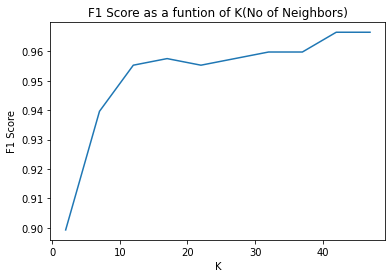

In [105]:
from sklearn.neighbors import KNeighborsClassifier
x=[]
y=[]
for i in range(2,50,5):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(tfidTrainFeatures,train_labels)
    y_pred = neigh.predict(tfidTestFeatures)
    x.append(i)
    y.append(neigh.score(tfidTestFeatures,test_labels))
plt.plot(x,y)
plt.title("F1 Score as a funtion of K(No of Neighbors)")
plt.xlabel("K")
plt.ylabel("F1 Score")
plt.show()

In [106]:
m=max(y)
index = y.index(m)
print("Max value of F1 Score occurs at K = ",x[index])
print("The Evaluation metrics are : ")
neigh = KNeighborsClassifier(n_neighbors=x[index])
neigh.fit(tfidTrainFeatures,train_labels)
y_pred = neigh.predict(tfidTestFeatures)
x = neigh.score(tfidTestFeatures,test_labels)
accuracy.append(x*100)
model.append('KNN')
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("F1 Score:",metrics.f1_score(test_labels, y_pred, average='weighted'))
print("Precision: ",metrics.precision_score(test_labels,y_pred, average='weighted'))
print("Recall: ",metrics.recall_score(test_labels,y_pred,average = 'weighted'))


Max value of F1 Score occurs at K =  42
The Evaluation metrics are : 
Accuracy: 0.9664429530201343
F1 Score: 0.9665599292386393
Precision:  0.9679950624254038
Recall:  0.9664429530201343


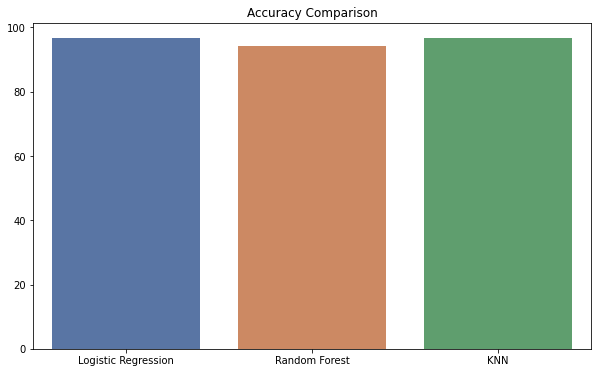

In [107]:
plt.figure(figsize=(10,6))
plt.title('Accuracy Comparison')
sns.barplot(x=model, y=accuracy, palette='deep')

In [108]:
for x in range(len(accuracy)):
    print(accuracy[x])

96.64429530201343
94.1834451901566
96.64429530201343


In [109]:
def Average(accuracy):
    return sum(accuracy) / len(accuracy)
average = Average(accuracy) 
print("Average accuracy of classifier models is =", round(average, 2))

Average accuracy of classifier models is = 95.82


In [110]:
y_pred = neigh.predict(tfidTestFeatures)

In [114]:
from sklearn.metrics import confusion_matrix                                    # import confusion matrix class
cm = confusion_matrix(test_labels,y_pred)                                       # create classifier of confussion_matrix
cm

array([[ 88,   0,   4,   0,   0],
       [  1,  81,   2,   0,   4],
       [  0,   0,  84,   1,   2],
       [  0,   0,   0, 112,   0],
       [  0,   0,   1,   0,  67]])

Text(159.0, 0.5, 'Truth')

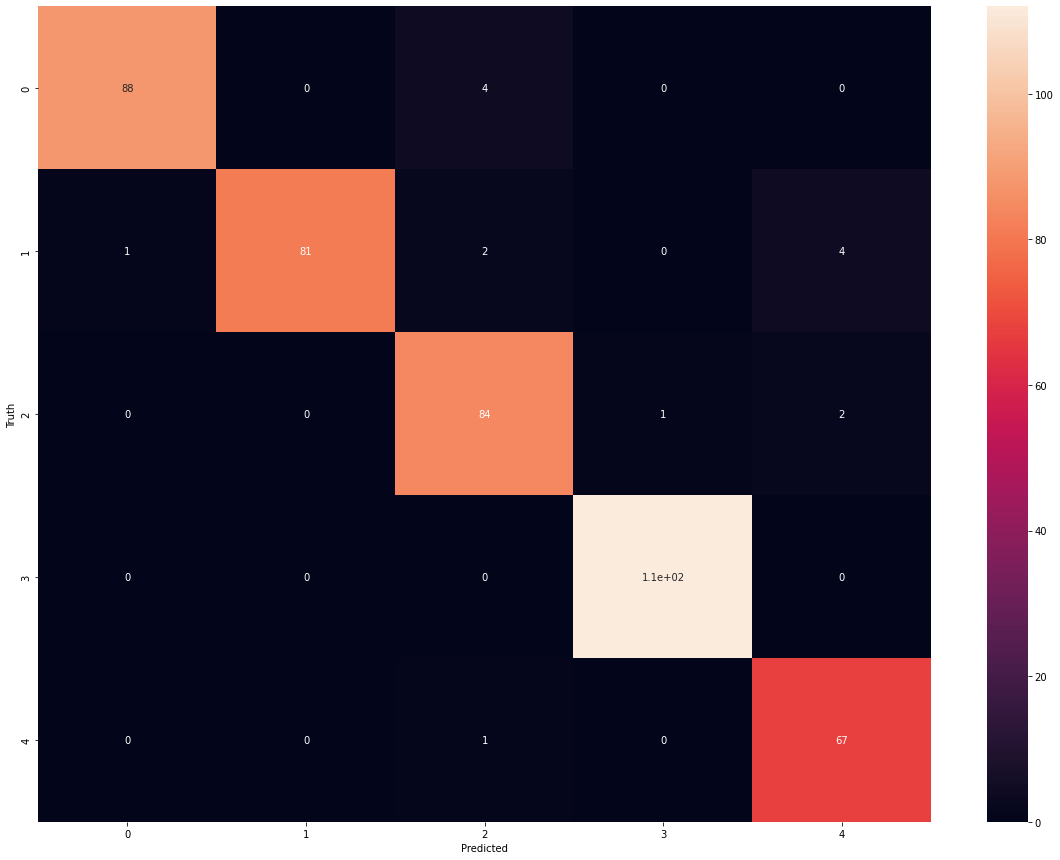

In [115]:
plt.figure(figsize = (20,15))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')